In [1]:
import tensorflow as tf

/Users/woohyunhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np

In [5]:
from sklearn.datasets import load_sample_image

In [6]:
china = load_sample_image("china.jpg")

In [7]:
flower = load_sample_image("flower.jpg")

In [8]:
dataset = np.array([china, flower], dtype = np.float32)

In [21]:
batch_size, height, width, channels = dataset.shape

In [84]:
dataset.shape
print (dataset[0,1,2,0])

173.0


In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt

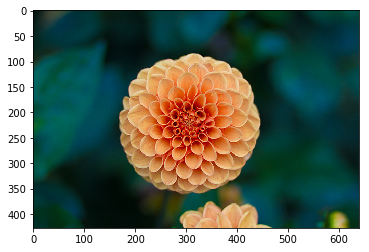

In [106]:
plt.imshow(dataset[1].astype(np.int)) # astype을 안하면 그림이 안나오는 이유는?


In [22]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)

In [23]:
filters[:, 3, :, 0] = 1 # 모든 행 중에 3번째 콜롬의 모든 채널의 첫번째 필터는 1이다 즉 수직선

In [35]:
filters[3,:, :,1] = 1 # 수평선

In [36]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

In [37]:
convolution = tf.nn.conv2d(X,filters, strides=[1,2,2,1], padding="SAME")

In [38]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict ={X: dataset})

In [57]:
output.shape

(2, 214, 320, 2)

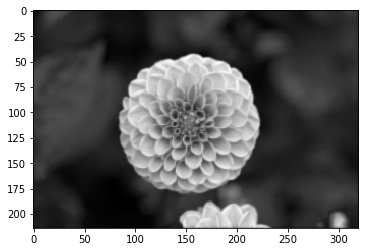

In [40]:
plt.imshow(output[1,:,:,0], cmap ="gray")

In [107]:
tf.reset_default_graph()

In [108]:
X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)

In [109]:
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="same")

In [110]:
init = tf.global_variables_initializer()

In [112]:
with tf.Session() as sess:
    init.run() #왜 여기선 글로벌베리어벌을 이니셜라이젼을 해줘야하는가?
    output2 = sess.run(conv, feed_dict ={X: dataset})

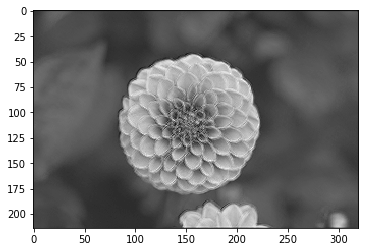

In [81]:
plt.imshow(output2[1,:,:,1], cmap="gray")

In [88]:
output2.shape
print (output2[0,1,2,1])

201.26271


In [89]:
tf.reset_default_graph()

In [90]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

In [91]:
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

In [92]:
with tf.Session() as sess:
    output3 = sess.run(max_pool, feed_dict={X:dataset})

(213, 320, 3)

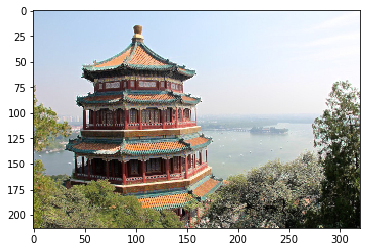

In [101]:
plt.imshow(output3[0].astype(np.uint8))
(output3[0].astype(np.uint8)).shape

# LeNet-5 따라해보기

| 층 | 종류 | 특성 맵 | 크기 | 커널크기 | 스트라이드 | 활성화함수
|:--------|:--------|:--------|:--------|:--------|:--------|:--------|
| 출력 | 완전연결 | - | 10 | - | - | RBF |
| F6 | 완전연결 | - | 84 | - | - | tanh |
    | C5 | 합성곱 | 120 | 1x1| 5x5 | 1 | tanh |
| S4| 평균 풀링 | 16 | 5x5 | 2x2 | 2 | tanh |
| C3 | 합성곱 | 16 | 10x10 | 5x5 | 1 | tanh |
| S2 | 평균 풀링 | 6 | 14x14 | 2x2 | 1 | tanh |
| C1 | 합성곱 |  6 | 28x28| 5x5 |1 | tanh |
| 입력 | 입력 | 1 | 32x32  | - |- | - |


In [1]:
import tensorflow as tf
import numpy as np

/Users/woohyunhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs_working13"
logdir = "{}/run-{}/".format(root_logdir, now)

In [3]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist=input_data.read_data_sets("MNIST")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
n_data = 55000
n_inputs_h = 28
n_inputs_w = 28
n_channel = 1
n_hidden1 = 84
n_outputs = 10

In [5]:
#print (reduced_valid)
mnist_train_images = mnist.train.images.reshape([-1, n_inputs_h, n_inputs_w, n_channel])
mnist_train_labels = mnist.train.labels
mnist_valid_images = mnist.validation.images.reshape([-1, n_inputs_h, n_inputs_w, n_channel])
mnist_valid_labels = mnist.validation.labels


In [6]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs_h, n_inputs_w, n_channel), name = "X") # 이미 scaled 되어있는 데이터가 들어갈 예정
Y = tf.placeholder(tf.int32, shape=(None), name="Y")
training = tf.placeholder_with_default(False, shape=(), name="training")

In [7]:
he_init = tf.contrib.layers.variance_scaling_initializer()

with tf.name_scope("LeNet"):
    output_C1 = tf.layers.conv2d(X, filters=6, kernel_size=5, strides=[1,1], padding="SAME", activation=tf.nn.tanh)
    #output_C1_act = tf.nn.tanh(output_C1)
    output_S2 = tf.nn.avg_pool(output_C1, ksize=[1, 2,2,1], strides=[1,2,2,1], padding="VALID")
    output_S2_act = tf.nn.tanh(output_S2)
    output_C3 = tf.layers.conv2d(output_S2_act, filters=16, kernel_size=5, strides=[1,1], padding="VALID", activation=tf.nn.tanh)
    output_S4 = tf.nn.avg_pool(output_C3, ksize=[1, 2,2,1], strides=[1,2,2,1], padding="VALID")
    output_S4_act = tf.nn.tanh(output_S4)
    output_C5 = tf.layers.conv2d(output_S4_act, filters=120, kernel_size=5, strides=[1,1], padding="VALID", activation=tf.nn.tanh)
    #print (output_C5.shape)
    output_C5_flatting = tf.reshape(output_C5, shape=[-1, 120*1*1])
    output_F6 = tf.layers.dense(output_C5_flatting, n_hidden1, activation=tf.nn.tanh)
    logits = tf.layers.dense(output_F6, n_outputs, activation=tf.nn.tanh)

In [8]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=logits)
    cost = tf.reduce_mean(xentropy, name="cost")

In [9]:
learning_rate = 0.001
with tf.name_scope("train"):
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    #optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(cost)

In [10]:
## DNN 평가를 위한 파트
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, Y, 1) ## 
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) ## type을 bool에서 float32로 바꿔줌

In [11]:
n_epochs = 30
batch_size = 30000 ## 최대한 트레이닝 샘플 개수의 약수로 나오게 현재는 28038개

In [12]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

cost_summary = tf.summary.scalar('cost', cost)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_batches = mnist_train_images.shape[0] // batch_size

In [ ]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        shuffled_idx = np.random.permutation(mnist_train_images.shape[0])
        X_batches = np.array_split(mnist_train_images[shuffled_idx], n_batches)
        Y_batches = np.array_split(mnist_train_labels[shuffled_idx], n_batches)
        batch_index = 0
        for X_batch, Y_batch in zip(X_batches, Y_batches):
            sess.run(training_op, feed_dict={X:X_batch, Y:Y_batch})
            batch_index += 1
            loss = cost.eval(feed_dict={X:X_batch, Y:Y_batch}) # iteration 돌릴때 cost=cost.eval(~)f로 하면 중복되어버림 즉 cost가 numpy float으로 선언되어버림
            step = epoch * n_batches + batch_index
            summary_str = cost_summary.eval(feed_dict={X: X_batch, Y: Y_batch})
            file_writer.add_summary(summary_str, step)
        acc_train = accuracy.eval(feed_dict={X:X_batch, Y:Y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist_valid_images, Y:mnist_valid_labels})
        #print (epoch, "Train accuracy:", acc_train, "Cost:", loss)
        print(epoch, "Train accuracy:", acc_train, "Validation accuracy:", acc_val)
    save_path = saver.save(sess, "./Ch13_LeNet_test_final.ckpt")
    file_writer.close()

0 Train accuracy: 0.6557818 Validation accuracy: 0.6586
1 Train accuracy: 0.7245091 Validation accuracy: 0.7334
2 Train accuracy: 0.78956366 Validation accuracy: 0.7932
3 Train accuracy: 0.7795454 Validation accuracy: 0.7848
4 Train accuracy: 0.71936363 Validation accuracy: 0.7254
5 Train accuracy: 0.7590182 Validation accuracy: 0.764
6 Train accuracy: 0.7812182 Validation accuracy: 0.7808
7 Train accuracy: 0.7752182 Validation accuracy: 0.776
8 Train accuracy: 0.77396363 Validation accuracy: 0.774
9 Train accuracy: 0.7944 Validation accuracy: 0.794
10 Train accuracy: 0.81854546 Validation accuracy: 0.8158
11 Train accuracy: 0.8372909 Validation accuracy: 0.8332
12 Train accuracy: 0.84096366 Validation accuracy: 0.839
13 Train accuracy: 0.83452725 Validation accuracy: 0.831
14 Train accuracy: 0.83274543 Validation accuracy: 0.83
